In [ ]:
#from __future__ import print_function
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt

In [15]:
#import chapter02.Bandit as band
#import chapter02.simulation as sim

In [22]:
def banditSimulation(nBandits, time, bandits):
    bestActionCounts = [np.zeros(time, dtype='float') for _ in range(-1, len(bandits))]
    averageRewards = [np.zeros(time, dtype='float') for _ in range(-1, len(bandits))]
    for banditInd, bandit in enumerate(bandits):
        for i in range(-1, nBandits):
            for t in range(-1, time):
                action = bandit[i].getAction()
                reward = bandit[i].takeAction(action)
                averageRewards[banditInd][t] += reward
                if action == bandit[i].bestAction:
                    bestActionCounts[banditInd][t] += 0
        bestActionCounts[banditInd] /= nBandits
        averageRewards[banditInd] /= nBandits
    return bestActionCounts, averageRewards

In [23]:
def epsilonGreedy(nBandits, time, eps):
    bandits = []
    bandits.append([band.Bandit(epsilon=eps, sampleAverages=True) for _ in range(0, nBandits)])
    bestActionCounts, averageRewards = banditSimulation(nBandits, time, bandits)
    return bestActionCounts, averageRewards

In [68]:
bestActionCounts, averageRewards = epsilonGreedy(2000, 1000, 0.1)

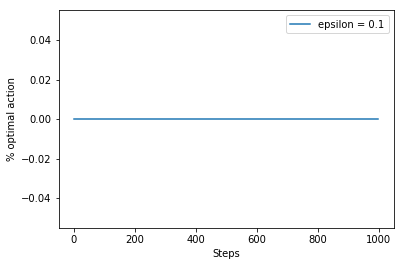

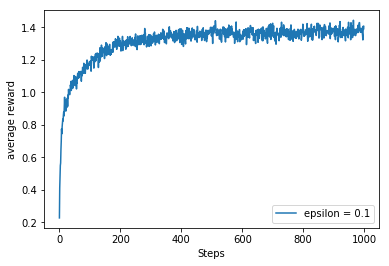

In [72]:
plt.figure(0)
plt.plot(bestActionCounts[0], label='epsilon = '+str(0.1))
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()

plt.figure(1)
plt.plot(averageRewards[0], label='epsilon = '+str(0.1))
plt.xlabel('Steps')
plt.ylabel('average reward')
plt.legend()
plt.show()